# Exploratory Data Analysis (EDA)

## Libraries

In [1]:
from utils import *
from load_data import *
from process_data import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
#!pip install wordcloud
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Data

In [2]:
# Load data
data = "../data/BBDD_SeAcabo.csv" # "data/BBDD_SeAcabo.csv" "AMI_IBEREVAL2018/es_AMI_TrainingSet_NEW.csv"
df = load_data(data)

## Target Categories

### Análisis General

#### Support of Classes

- Before Preprocessing

In [3]:
# Support of classes
print(df['Análisis General'].value_counts())

Análisis General
Comentario Positivo    2117
Comentario Negativo     435
Comentario Neutro       120
Name: count, dtype: int64


- After Preprocessing

In [4]:
filtered_df, labels_names = filter_by_type(df, "analisis_general", "")


Soporte de etiquetas con nombres originales:
Comentario Positivo: 2117
Comentario Negativo: 435


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels


#### Plots

In [5]:
# Asumiendo que filtered_df es tu DataFrame ya filtrado
class_counts = filtered_df['Análisis General'].value_counts()

# Decidir qué clases destacar
highlight_classes = ['Comentario Negativo']

default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Asignar colores a cada barra
colors = [highlight_color if cls in highlight_classes else default_color for cls in class_counts.index]

- Bar Chart

C:\Users\jorge\AppData\Local\Temp\ipykernel_23708\1158436564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)


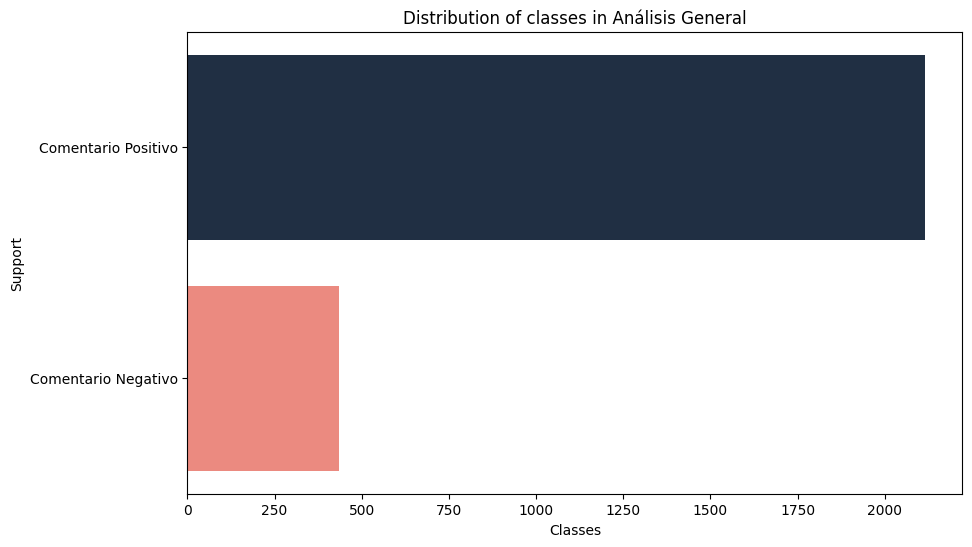

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)
plt.title('Distribution of classes in Análisis General')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

- Pie Chart

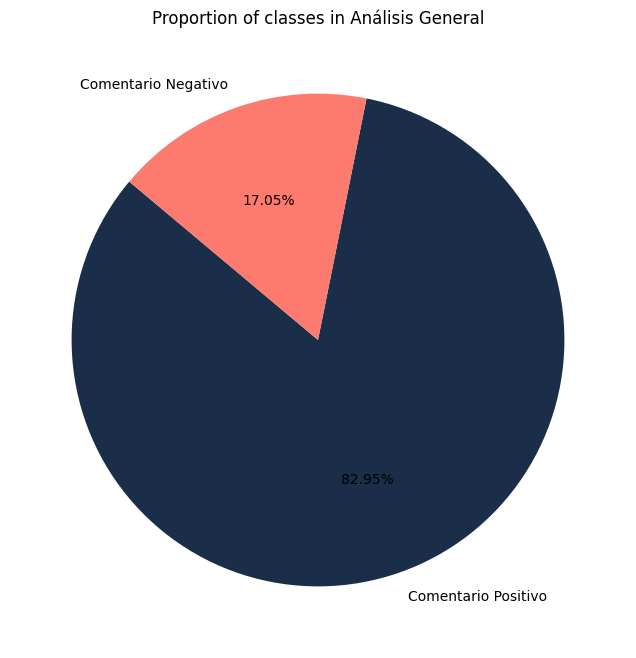

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proportion of classes in Análisis General')
plt.show()

### Contenido Negativo

#### Support of Classes

- Before Processing

In [8]:
# Support of classes
print(df['Contenido Negativo'].value_counts())

Contenido Negativo
Desprestigiar Deportista Autora    180
Desprestigiar Víctima               89
Desprestigiar Acto                  81
Insultos                            70
Sexualización / Objetivización       8
Estereotipos de Género               6
Violencia de Género                  1
Name: count, dtype: int64


- After Processing

In [9]:
filtered_df, labels_names = filter_by_type(df, "contenido_negativo", "")


Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 89
Desprestigiar Acto: 81
Insultos: 70
Desprestigiar Deportista Autora: 180


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


#### Plots

In [10]:
# Asumiendo que filtered_df es tu DataFrame ya filtrado
class_counts = filtered_df['Contenido Negativo'].value_counts()

# Decidir qué clases destacar
highlight_classes = ['Insultos']

default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Asignar colores a cada barra
colors = [highlight_color if cls in highlight_classes else default_color for cls in class_counts.index]

- Bar Chart

C:\Users\jorge\AppData\Local\Temp\ipykernel_23708\671644466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)


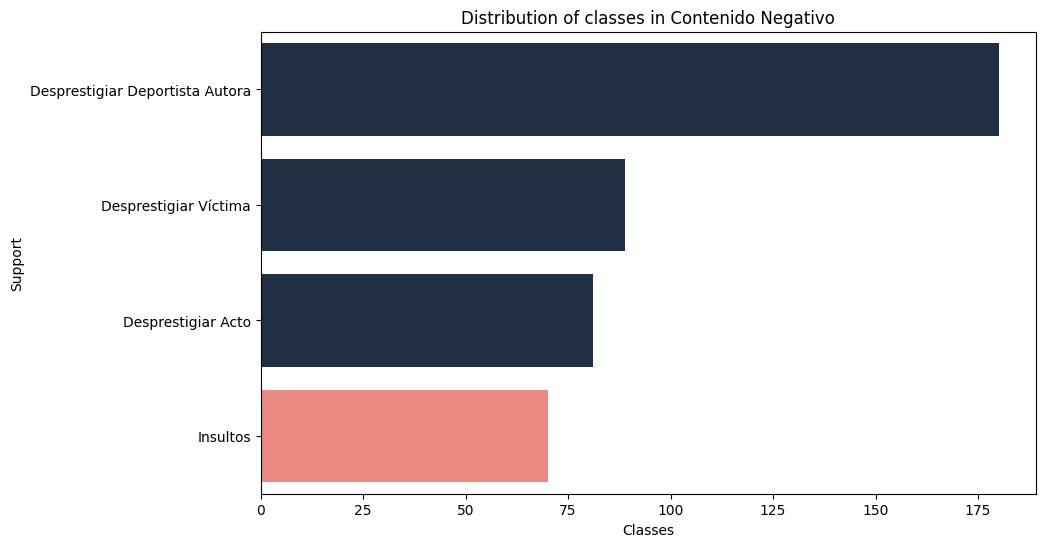

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)
plt.title('Distribution of classes in Contenido Negativo')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

- Pie Chart

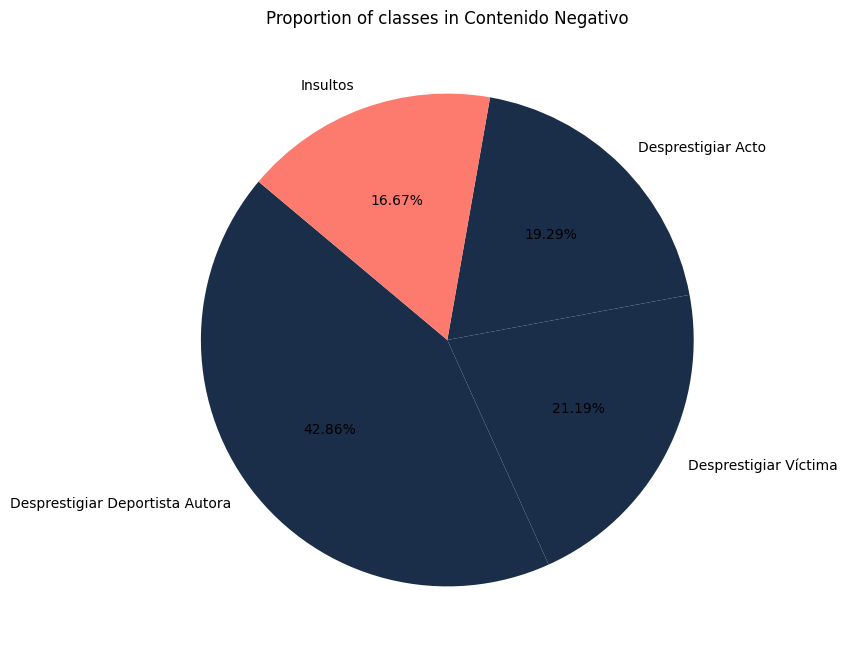

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proportion of classes in Contenido Negativo')
plt.show()

### Insultos

#### Support of Classes

- Before Processing

In [13]:
# Support of classes
print(df['Insultos'].value_counts())

Insultos
Deseo de Dañar           67
Genéricos                64
Sexistas/misóginos       53
Sarcasmo                 31
Imposición               13
Objetivización Sexual     4
Name: count, dtype: int64


- After Processing

In [14]:
filtered_df, labels_names = filter_by_type(df, "insultos", "")

435
232

Soporte de etiquetas con nombres originales:
Sexistas/misóginos: 53
Genéricos: 112
Deseo de Dañar: 67


#### Plots

In [57]:
# Asumiendo que filtered_df es tu DataFrame ya filtrado
class_counts = filtered_df['Insultos'].value_counts()

# Decidir qué clases destacar
highlight_classes = ['Genéricos']

default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Asignar colores a cada barra
colors = [highlight_color if cls in highlight_classes else default_color for cls in class_counts.index]

- Bar Chart

C:\Users\jorge\AppData\Local\Temp\ipykernel_14256\1389417758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)


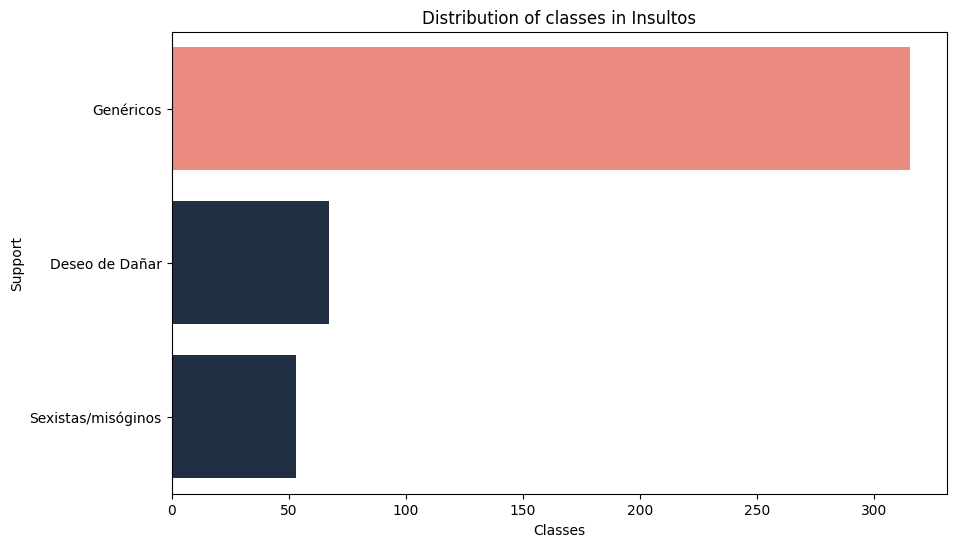

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)
plt.title('Distribution of classes in Insultos')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

- Pie Chart

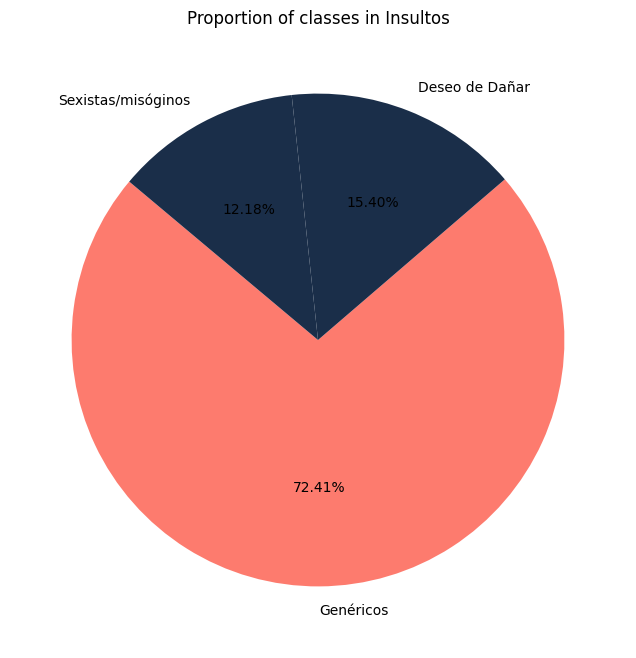

In [59]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proportion of classes in Insultos')
plt.show()

### Relationship

In [16]:
filtered_df, labels_names = filter_by_type(df, "analisis_general", "")
filtered_df, labels_names = filter_by_type(filtered_df, "contenido_negativo", "")
filtered_df, labels_names = filter_by_type(df, "insultos", "")

# Filtrar para "Comentario Negativo" en "Análisis General"
com_neg_df = filtered_df[filtered_df['Análisis General'] == 'negativo']


Soporte de etiquetas con nombres originales:
Comentario Positivo: 2117
Comentario Negativo: 435

Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 89
Desprestigiar Acto: 81
Insultos: 70
Desprestigiar Deportista Autora: 180
435
232

Soporte de etiquetas con nombres originales:
Sexistas/misóginos: 53
Genéricos: 112
Deseo de Dañar: 67


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


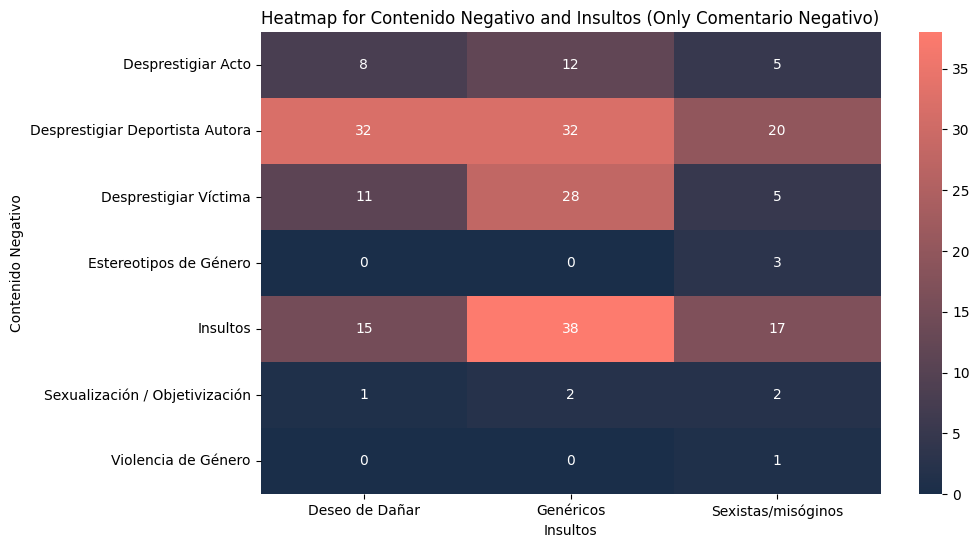

In [17]:
# Crear una tabla de contingencia
pivot_table = pd.crosstab(index=filtered_df['Contenido Negativo'], columns=filtered_df['Insultos'])

# Colores personalizados
default_color = "#1a2e49"  # Color for regular values
highlight_color = "#fd7b6e"  # Color for high values

# Crear una paleta de colores personalizada
cmap = LinearSegmentedColormap.from_list("custom_cmap", [default_color, highlight_color])

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt='d')
plt.title('Heatmap for Contenido Negativo and Insultos (Only Comentario Negativo)')
plt.ylabel('Contenido Negativo')
plt.xlabel('Insultos')
plt.show()

## Statistical Summary

In [65]:
# Resumen estadístico de variables numéricas
print(df.describe())

          view_count  bookmark_count  favorite_count  reply_count  \
count    2672.000000     2672.000000     2672.000000  2672.000000   
mean     6658.452096        0.180763       33.035554     1.344311   
std     23688.581016        1.980785      195.174855     8.849447   
min         0.000000        0.000000        0.000000     0.000000   
25%        62.000000        0.000000        0.000000     0.000000   
50%       223.000000        0.000000        1.000000     0.000000   
75%      1148.000000        0.000000        4.000000     0.000000   
max    352539.000000       55.000000     4459.000000   289.000000   

       retweet_count  quote_count  followers_count  following_count  \
count    2672.000000  2672.000000     2.672000e+03      2672.000000   
mean        2.323728     0.088698     1.639193e+04      2534.236527   
std        19.356214     0.748386     8.267323e+04     11641.661409   
min         0.000000     0.000000     0.000000e+00         0.000000   
25%         0.000000   

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Set the number of subplots based on the number of numeric columns
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols.columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Flatten the array of axes
axes = axes.flatten()

# Iterate over the numeric columns and create a boxplot for each one
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# If there are any subplots not used, hide them
for ax in axes[len(numeric_cols.columns):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Detect Languages

#### Languages Counts

In [4]:
# Compute counts
lang_counts = df['lang'].value_counts()

# Compute the percentages of the total
lang_percentages = (lang_counts / lang_counts.sum()) * 100

# Combine counts and percentages
lang_stats = pd.DataFrame({
    'Count': lang_counts,
    'Percentage': lang_percentages
})

print(lang_stats)

      Count  Percentage
lang                   
es     1687   63.136228
qme     530   19.835329
en      166    6.212575
ca      110    4.116766
pt       49    1.833832
und      43    1.609281
eu       18    0.673653
it       15    0.561377
sv       12    0.449102
in       11    0.411677
qam       8    0.299401
fr        6    0.224551
ar        4    0.149701
nl        3    0.112275
tl        2    0.074850
hu        2    0.074850
ht        1    0.037425
lt        1    0.037425
tr        1    0.037425
hi        1    0.037425
cy        1    0.037425
fi        1    0.037425


In [162]:
df[df["lang"]=="und"]

,Autora,full_text,Análisis General,Contenido Negativo,Insultos,Insulto 1,Insulto 2,Insulto 3,Emisor,Contenido AV.,...,fast_followers_count,normal_followers_count,followed_by,following,location,profile_banner_url,profile_url,avatar_url,verified,is_blue_verified
148,Jenni Hermoso,"@Jennihermoso @jacintodavila ¡Fuerza, Jenni!",Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,171007,NaN,NaN,"Caracas, Venezuela",https://pbs.twimg.com/profile_banners/12493262...,https://www.twitter.com/lubrio,https://pbs.twimg.com/profile_images/184971246...,False,False
297,Alexia Putellas,@alexiaputellas @Jennihermoso LFGGGGGGG❤️❤️❤️,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3443,NaN,NaN,Lagos Nigeria,https://pbs.twimg.com/profile_banners/42518336...,https://www.twitter.com/Iam_muizzsoliu,https://pbs.twimg.com/profile_images/169106712...,False,True
299,Alexia Putellas,"@alexiaputellas @Jennihermoso Dilo, Alexia.",Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,58588,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/11363697...,https://www.twitter.com/Reycholosimeone,https://pbs.twimg.com/profile_images/160408465...,False,True
370,Alexia Putellas,@alexiaputellas @Jennihermoso Big 🤝 https://t....,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3985,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/15208691...,https://www.twitter.com/EleojoFranklin,https://pbs.twimg.com/profile_images/168964303...,False,True
405,FUTPRO,@futpro_es @SEFutbolFem @Jennihermoso Jódete R...,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1729,NaN,NaN,España,https://pbs.twimg.com/profile_banners/26474030...,https://www.twitter.com/Xaviyago,https://pbs.twimg.com/profile_images/161186108...,False,True
572,FUTPRO,@futpro_es @SEFutbolFem @Jennihermoso RIP @rfef,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,104,NaN,NaN,Madrid,NaN,https://www.twitter.com/bichino_o,https://pbs.twimg.com/profile_images/616550768...,False,False
608,Aitana Bonmati,@AitanaBonmati MVP,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,67550,NaN,NaN,"Principado de Asturias, España",https://pbs.twimg.com/profile_banners/39043798...,https://www.twitter.com/elopi23,https://pbs.twimg.com/profile_images/144695879...,False,True
617,Aitana Bonmati,@elopi23 @AitanaBonmati PLM,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3452,NaN,NaN,Galicia,https://pbs.twimg.com/profile_banners/14532808...,https://www.twitter.com/Basilio_rm,https://pbs.twimg.com/profile_images/168405211...,False,True
764,Aitana Bonmati,@AitanaBonmati Brava!!!,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,657,NaN,NaN,"No soy de aquí, ni soy de allá",https://pbs.twimg.com/profile_banners/16484064...,https://www.twitter.com/DaCaRoC,https://pbs.twimg.com/profile_images/164911186...,False,False
859,Cata Coll,"@catacoll2001 @Jennihermoso .,. https://t.co/C...",Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9818,NaN,NaN,Cataluña ✊💜💛♥️✊,https://pbs.twimg.com/profile_banners/14003913...,https://www.twitter.com/Giorgio7716,https://pbs.twimg.com/profile_images/164212369...,False,False


#### Plots

In [6]:
# Languages to highlight
highlight_langs = ['es', 'cy', 'ht', 'in', 'lt', 'qam', 'tl', 'und']

# Colors for bars
default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Assign colors to each language based on whether they are in the highlight list
bar_colors = [highlight_color if lang in highlight_langs else default_color for lang in lang_counts.index]

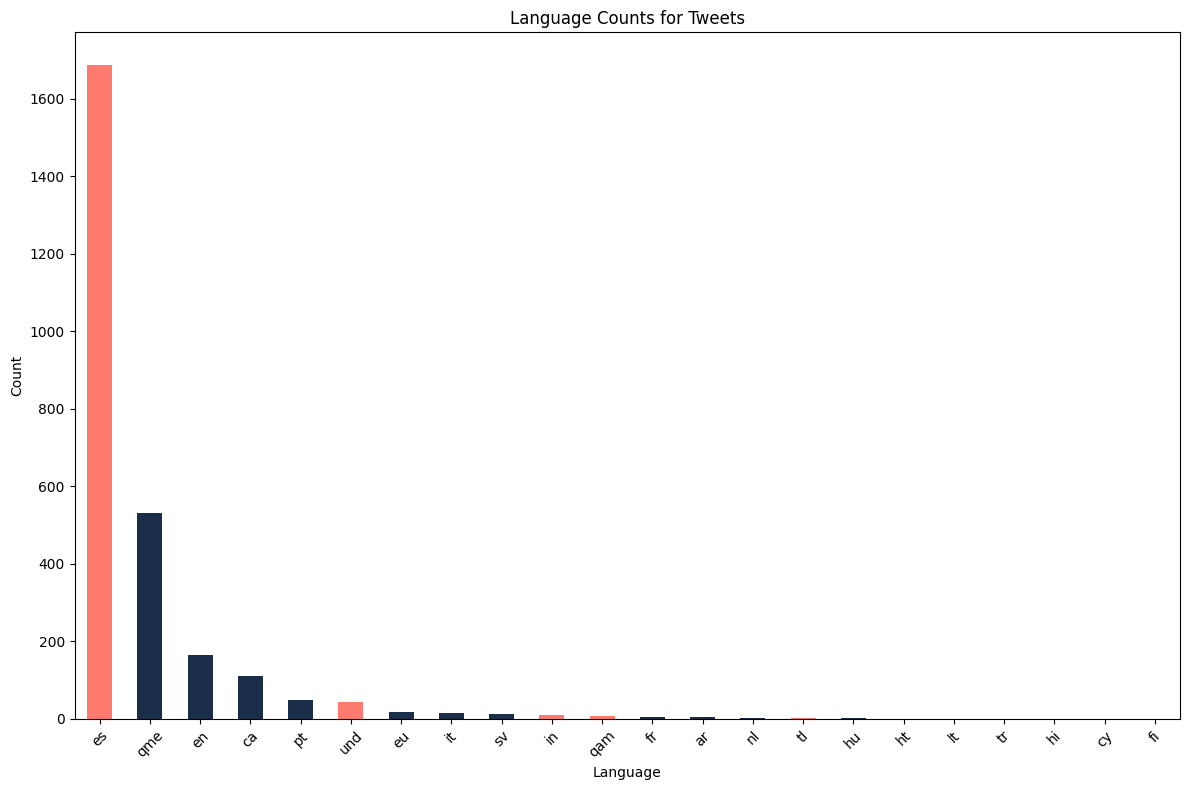

In [7]:
# Create the histogram with specified colors
plt.figure(figsize=(12, 8))
lang_counts.plot(kind='bar', color=bar_colors)
plt.title('Language Counts for Tweets')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sender

In [165]:
# Compute counts - faltan NAs
sender_counts = df['Emisor'].value_counts()

# Compute the percentages of the total
sender_percentages = (sender_counts / sender_counts.sum()) * 100

# Combine counts and percentages
sender_stats = pd.DataFrame({
    'Count': sender_counts,
    'Percentage': sender_percentages
})

print(sender_stats)

              Count  Percentage
Emisor                         
Fake            252   63.636364
Hombre          106   26.767677
Mujer            36    9.090909
Organización      1    0.252525
Falsa             1    0.252525


## Timestamp

In [192]:
df['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\jorge\AppData\Local\Temp\ipykernel_14256\329245698.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


### Per Day

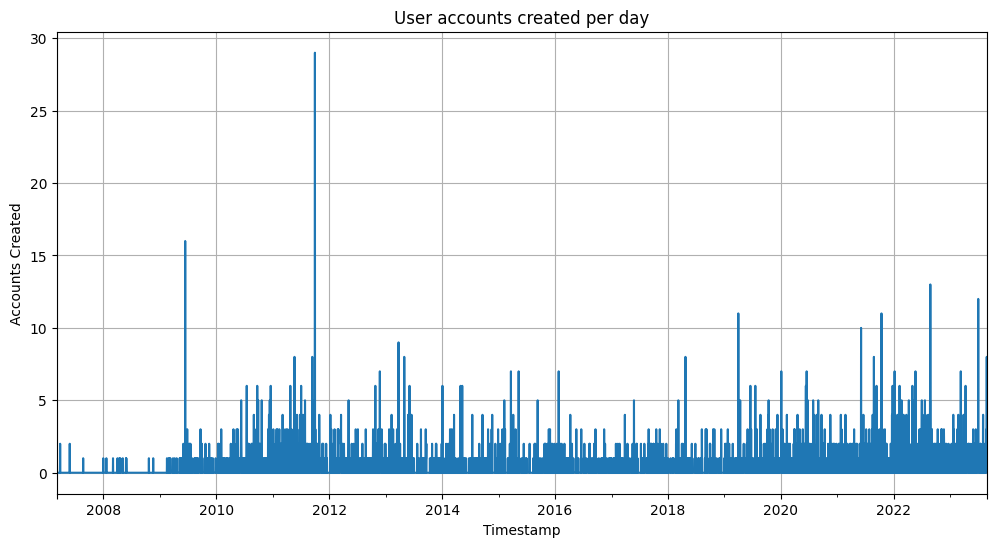

In [174]:
# Agrupar por fecha y contar entradas
daily_counts = df.set_index('created_at').resample('D').size()

# Plotear la serie temporal
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('User accounts created per day')
plt.xlabel('Timestamp')
plt.ylabel('Accounts Created')
plt.grid(True)
plt.show()

## Tweets Analysis

In [142]:
# Filter by lang
tweets_df = filter_by_lang(df)
# Normalize data
tweets_df = normalize_data(tweets_df)
# Add special tokens
#tweets_df = add_special_tokens(tweets_df)

c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_count_scaled'] = scaler.fit_transform(df[['view_count']])
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_count'] = df['user_mentions'].apply(count_user_mentions)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_dat

In [143]:
tweets = tweets_df['full_text_processed'].tolist()

In [126]:
stop_words = set(stopwords.words('spanish'))

### Word Cloud

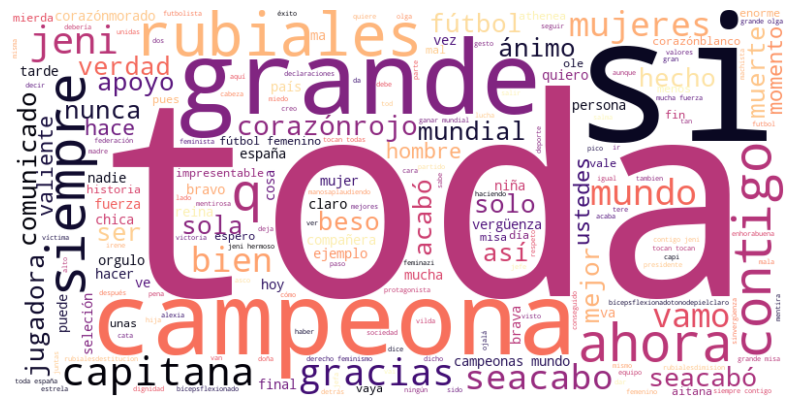

In [166]:
# Crear la lista de palabras
words = [word for tweet in tweets for word in tweet.split()]
all_words = ' '.join(words)

# Generar el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = "magma").generate(all_words)

# Mostrar el WordCloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Top 10 Most Common Words

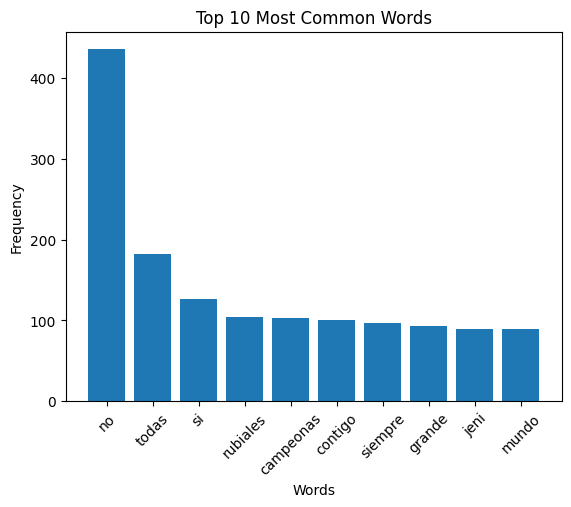

In [167]:
# Filter out words that start with '@' or '#' and are not in stop words
count = Counter(words)
most_common = count.most_common(10)

words, frequencies = zip(*most_common)
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Words in Target Columns

In [158]:
# Función para contar las palabras más comunes en una serie de textos
def get_most_common_words(tweets, top_n=10):
    words = [tweet for tweet in tweets]
    all_words = ' '.join(words).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

#### Análisis General

In [159]:
# Agrupar tweets por la etiqueta y contar las palabras más comunes para cada etiqueta
ageneral_tweets,_ = filter_by_type(tweets_df, "analisis_general", "")
ageneral_tweets = ageneral_tweets.groupby('Análisis General')['full_text_processed']

most_common_words_by_label = {label: get_most_common_words(group_texts) for label, group_texts in ageneral_tweets}

# Imprimir las palabras más comunes por etiqueta
for label, common_words in most_common_words_by_label.items():
    print(f"Etiqueta '{label}':")
    for word, freq in common_words:
        print(f"  {word}: {freq}")
    print()



Soporte de etiquetas con nombres originales:
Comentario Positivo: 1283
Comentario Negativo: 367
Etiqueta 'Comentario Negativo':
  no: 203
  si: 63
  ahora: 38
  q: 37
  rubiales: 36
  beso: 31
  jeni: 29
  mundial: 23
  verdad: 21
  bien: 20

Etiqueta 'Comentario Positivo':
  no: 217
  todas: 157
  campeonas: 99
  contigo: 91
  grande: 91
  siempre: 87
  mundo: 73
  rubiales: 64
  gracias: 61
  si: 59



c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels


#### Contenido Negativo

In [148]:
# Agrupar tweets por la etiqueta y contar las palabras más comunes para cada etiqueta
cnegativo_tweets,_ = filter_by_type(tweets_df, "contenido_negativo", "")
cnegativo_tweets = cnegativo_tweets.groupby('Contenido Negativo')['full_text_processed']

most_common_words_by_label = {label: get_most_common_words(group_texts) for label, group_texts in cnegativo_tweets}

# Imprimir las palabras más comunes por etiqueta
for label, common_words in most_common_words_by_label.items():
    print(f"Etiqueta '{label}':")
    for word, freq in common_words:
        print(f"  {word}: {freq}")
    print()



Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 71
Desprestigiar Acto: 73
Insultos: 60
Desprestigiar Deportista Autora: 148
Etiqueta 'Desprestigiar Acto':
  no: 68
  rubiales: 16
  beso: 13
  si: 9
  bien: 8
  q: 8
  vergüenza: 7
  ver: 6
  mundial: 6
  mujeres: 6

Etiqueta 'Desprestigiar Deportista Autora':
  no: 71
  ahora: 22
  si: 18
  q: 15
  capitana: 11
  mundial: 10
  tarde: 10
  todas: 9
  mas: 6
  ir: 6

Etiqueta 'Desprestigiar Víctima':
  no: 37
  si: 25
  jeni: 21
  beso: 11
  ahora: 10
  rubiales: 9
  comunicado: 8
  mundo: 7
  q: 7
  hace: 7

Etiqueta 'Insultos':
  no: 22
  mujeres: 7
  vergüenza: 7
  mentirosa: 6
  feminazis: 6
  si: 6
  verdad: 6
  capitana: 6
  bien: 5
  mala: 5



c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


#### Insultos

In [149]:
# Agrupar tweets por la etiqueta y contar las palabras más comunes para cada etiqueta
insults_tweets,_ = filter_by_type(tweets_df, "insultos", "")
insults_tweets = insults_tweets.groupby('Insultos')['full_text_processed']

most_common_words_by_label = {label: get_most_common_words(group_texts) for label, group_texts in insults_tweets}

# Imprimir las palabras más comunes por etiqueta
for label, common_words in most_common_words_by_label.items():
    print(f"Etiqueta '{label}':")
    for word, freq in common_words:
        print(f"  {word}: {freq}")
    print()



Soporte de etiquetas con nombres originales:
Genéricos: 261
Sexistas/misóginos: 48
Deseo de Dañar: 58
Etiqueta 'Deseo de Dañar':
  no: 19
  si: 10
  verdad: 5
  beso: 5
  rubiales: 5
  mundial: 4
  parece: 4
  mentir: 3
  pasó: 3
  ve: 3

Etiqueta 'Genéricos':
  no: 152
  si: 49
  ahora: 29
  rubiales: 26
  q: 25
  jeni: 24
  beso: 20
  mundial: 17
  capitana: 17
  bien: 15

Etiqueta 'Sexistas/misóginos':
  no: 32
  q: 9
  feminazis: 7
  beso: 6
  ahora: 6
  rubiales: 5
  mujeres: 5
  así: 5
  feministas: 4
  bien: 4



c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insultos'] = df['Insultos'].where(df['Insultos'].isin(etiquetas), other="Genéricos")
